In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import dijet
import random
from IPython.display import display, Math
from tqdm import tqdm

# setup plotting
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["axes.labelsize"] = 16  
plt.rcParams["xtick.labelsize"] = 14  
plt.rcParams["ytick.labelsize"] = 14
plt.rcParams["axes.titlesize"] = 18  
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"
%config InlineBackend.figure_format = 'retina'

In [31]:
# theory

dj = dijet.DIJET(IR_reg=['gauss', 0.4])

roots = 320
space = {
    'y' : [0.1, 0.7],
    'z' : [0.3, 0.7],
    'Q2': [16, 100],
    't' : [0.01, 0.1],
    'phi_Dp': [0, 2*np.pi],
    'phi_kp': [0, 2*np.pi]
}

pT_values = np.linspace(4, 10, 10)
npoints = 8

theory = dj.get_integrated_xsec(pT_values, roots**2, space, points=npoints, kind='den', r0=1.2)


--> loaded unpol. amp. data from /dipoles/narr_ymin4.61_ymax14.91_AAMS09.dat
--> loaded pol. amp. data from /dipoles/d05-rc/
--> loaded params from /dipoles/replica_params_pp.csv
--> loaded random moment params from /dipoles/random_moment_params.csv
--> loaded replica 1


In [32]:
# exp 

exp_data = [43.3, 8.82] 
exp_error = [np.sqrt(6.2**2 + 9.4**2), np.sqrt(1.78**2 + 1.65**2)]
exp_pTs = [6, 8.5]


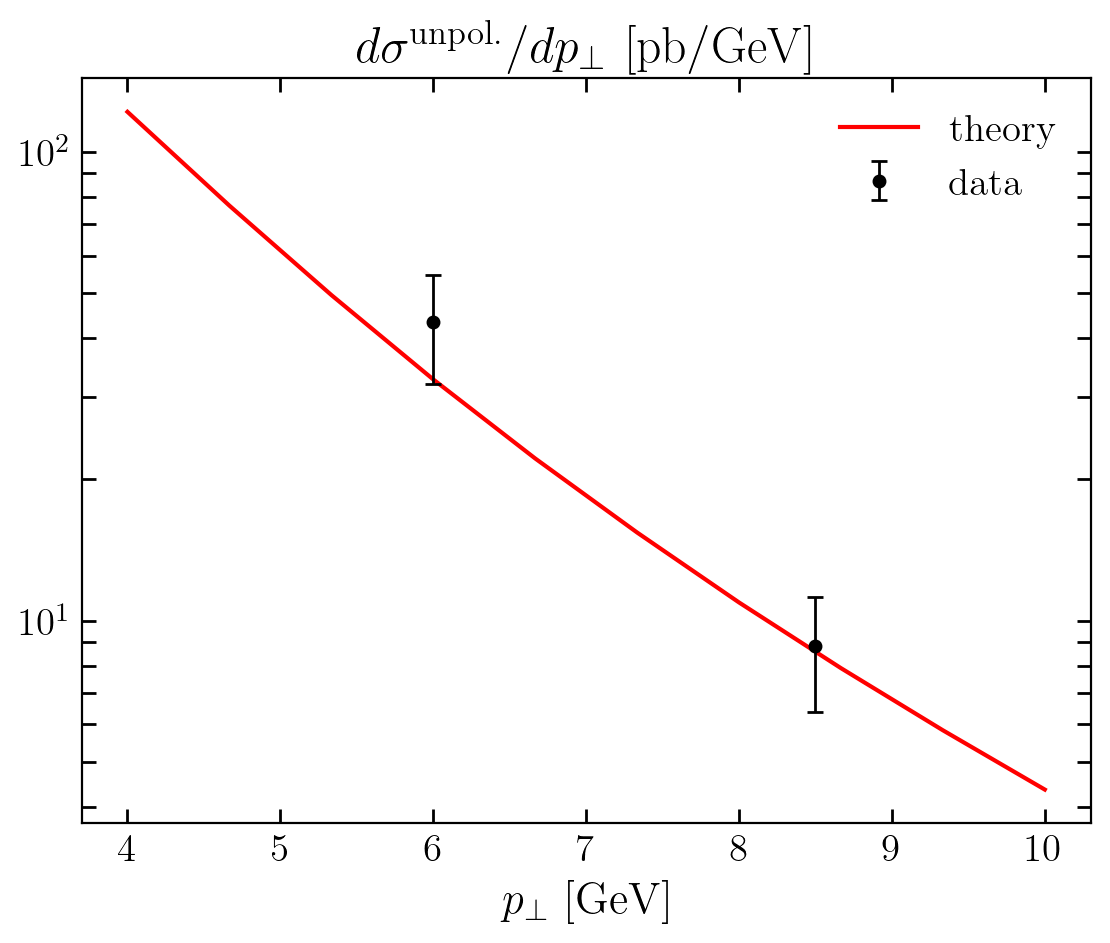

In [33]:
# plot azimuthal correlations
asp_ratio = 3.5/3
psize = 5
nrows, ncols = 1, 1
fig, ax = plt.subplots(nrows, ncols, figsize=(asp_ratio*psize*ncols, psize*nrows))

ax.plot(pT_values, theory/(1000), color='red', label='theory')

ax.errorbar(
        exp_pTs, exp_data, yerr=exp_error, fmt='o',
        capsize=3, elinewidth=1, capthick=1, color='black', markersize=4.0, 
        label='data'
)

ax.set_xlabel(r'$p_{\perp}$ [GeV]')
ax.set_title(r'$ d \sigma^{\mathrm{unpol.}} / d p_{\perp}  \,\, [\mathrm{pb/GeV}]$')
ax.tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)
ax.legend(frameon=False, fontsize=14)
ax.semilogy()
# axs[0].set_ylim([-0.1, 0.1])

plt.tight_layout()
plt.show()

# if plot_bands:
#     fig.savefig('plots/dsa_band_error.pdf', dpi=400, bbox_inches="tight")
# else:
#     fig.savefig('plots/dsa_lines_fit_comparison.pdf', dpi=400, bbox_inches="tight")
